In [1]:
import numpy as np

from lamp import *
from lamp.models import *
from lamp.utils import * 

In [40]:
def analyse_compression(model, datax, datay, dtype="mnist", title="", classes=range(10)):
    decoded = model.predict(datax)
    nb_classes = len(classes)

    show = show_mnist if dtype == "mnist" else show_usps

    examples = np.zeros(nb_classes, dtype=np.int64)
    for i, v in enumerate(classes):
        examples[i] = np.where(datay == v)[0][0]

    plt.figure(figsize=(12, 3))
    for i, x in enumerate(examples):
        plt.subplot(2, nb_classes, i + 1)
        show(datax[x])
        plt.subplot(2, nb_classes, i + nb_classes + 1)
        show(decoded[x])

    plt.title(title)
    plt.show()


def plot_data(datax, datay, title):
    examples = np.zeros(10, dtype=np.int64)

    for i in range(10):
        examples[i] = np.where(datay == i)[0][0]

    plt.figure(figsize=(16, 2))
    for i, x in enumerate(examples):
        plt.subplot(1, 10, i + 1)
        show_mnist(datax[x])
        plt.xticks([])
        plt.yticks([])

    plt.suptitle(title)

In [41]:

(train_X, train_y), (test_X, test_y) = load_mnist()

# classes = [7, 2, 3, 4, 5]
# train_X, train_y = get_mnist(classes, train_X, train_y)
# test_X, test_y = get_mnist(classes, test_X, test_y)

onehot = to_onehot(train_y)

train_X.shape

(60000, 784)

In [42]:
mc = MultiClass()
mc.fit(train_X, onehot, hidden=256, nb_iter=1000, gradient_step=1e-2, batch_size=500, early_stop=1e-6)

print(f"Training classification score : {mc.score(train_X, train_y)}")
print(f"Testing classification score : {mc.score(test_X, test_y)}")

C:\Users\Jules Dubreuil\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3515: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype, out=out, **kwargs)
C:\Users\Jules Dubreuil\AppData\Roaming\Python\Python39\site-packages\numpy\core\_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Training classification score : 0.8770666666666667
Testing classification score : 0.8798


In [44]:
ae10 = AutoEncoder()
ae10.fit(train_X, train_X, hidden=[256], latent=10, nb_iter=3000, gradient_step=2e-4, batch_size=500, early_stop=None)

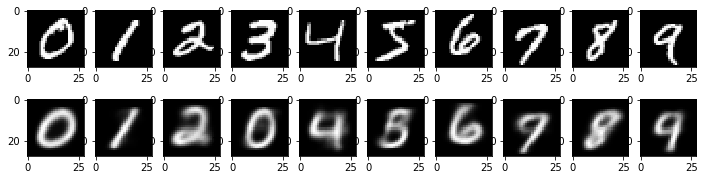

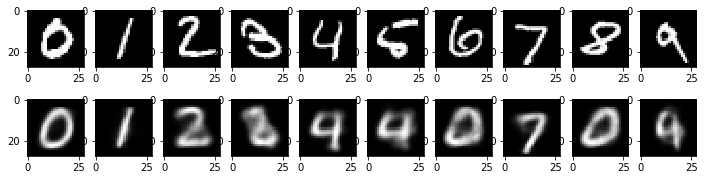

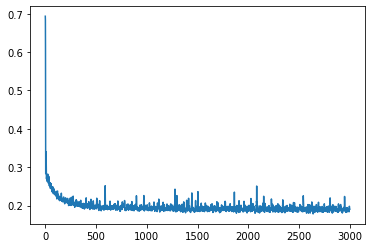

0.66185
0.6718


In [9]:
analyse_compression(ae10, train_X, train_y, dtype="mnist")
analyse_compression(ae10, test_X, test_y, dtype="mnist")

timesteps = np.arange(len(ae10.train_losses))
plt.plot(timesteps, ae10.train_losses)
plt.show()

print(mc.score(ae10.predict(train_X), train_y))
print(mc.score(ae10.predict(test_X), test_y))

In [ ]:
ae28 = AutoEncoder()
ae28.fit(train_X, train_X, hidden=[256], latent=10, nb_iter=3000, gradient_step=2e-4, batch_size=500, early_stop=None)

In [ ]:
noise_amount = 0.6
train_Xnoised = noise_data(train_X, noise_amount)
test_Xnoised = noise_data(test_X, noise_amount)

In [ ]:
ae_noise = AutoEncoder()
ae_noise.fit(train_Xnoised, train_X, hidden=[256], latent=128, nb_iter=2000, gradient_step=5e-5, batch_size=500, early_stop=None)

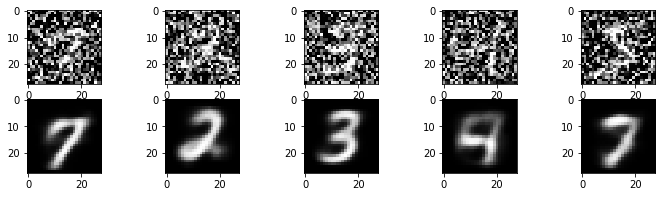

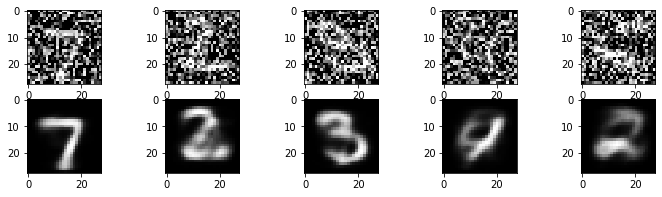

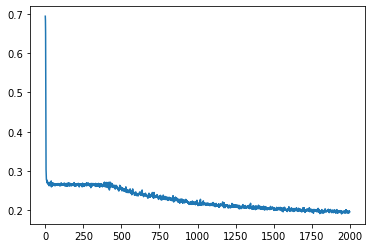

0.8025120707701657
0.8044093851132686


In [ ]:
analyse_compression(ae_noise, train_Xnoised, train_y, dtype="mnist", classes=classes)
analyse_compression(ae_noise, test_Xnoised, test_y, dtype="mnist", classes=classes)

timesteps = np.arange(len(ae_noise.train_losses))
plt.plot(timesteps, ae_noise.train_losses)
plt.show()

print(mc.score(ae_noise.predict(train_X), train_y))
print(mc.score(ae_noise.predict(test_X), test_y))

In [ ]:
decoded = ae_batch.predict(test_X)

plot_data(test_X, test_y, "original images")
plot_data(decoded, test_y, "reconstructed images (from size 10)")